# An Analysis of Top 50 Streamed Songs on Spotify

Matt Stone

### Research Question:
What features about a song predict it's rank in Spotify streams?

Data and Analysis setup

In [2]:
# load each dataset into pandas dataframe
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
sns.set(style="darkgrid")
df = pd.read_csv("spotify_all.csv", engine = "python")

##### Display Data

In [3]:
df.head()

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
0,2017,1,Shape of You,Ed Sheeran,0.825,0.652,-3.183,0.0802,0.5810,0.0931,0.931,95.977,233.713,3.895217
1,2017,2,Despacito - Remix,Luis Fonsi,0.694,0.815,-4.328,0.1200,0.2290,0.0924,0.813,88.931,228.827,3.813783
2,2017,3,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,-4.757,0.1700,0.2090,0.1120,0.846,177.833,228.200,3.803333
3,2017,4,Something Just Like This,The Chainsmokers,0.617,0.635,-6.769,0.0317,0.0498,0.1640,0.446,103.019,247.160,4.119333
4,2017,5,I'm the One,DJ Khaled,0.609,0.668,-4.284,0.0367,0.0552,0.1670,0.811,80.924,288.600,4.810000


#### Data Breakdown

Most appearances

In [4]:
most_appearences = df['artists'].value_counts()
print(most_appearences.head())

Ed Sheeran      11
Post Malone     10
Drake            8
Marshmello       6
XXXTENTACION     6
Name: artists, dtype: int64


In [5]:
df.groupby('year').danceability.mean()

year
2017    0.69682
2018    0.71646
2019    0.71380
Name: danceability, dtype: float64

In [6]:
df.groupby('year').danceability.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2017,100.0,0.69682,0.125080,0.258,0.6350,0.714,0.77025,0.927
2018,100.0,0.71646,0.131070,0.258,0.6355,0.733,0.79825,0.964
2019,50.0,0.71380,0.119299,0.290,0.6700,0.735,0.79750,0.900


In [7]:
df[df['rank']==df['rank'].max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
99,2017,100,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,-6.593,0.0390,0.101,0.1060,0.0967,180.043,239.000,3.983333
199,2018,100,Be Alright,Dean Lewis,0.553,0.586,-6.319,0.0362,0.697,0.0813,0.4430,126.684,196.373,3.272883


#### Data Visualizations

In [8]:
df_50 = df[df['rank'] < 51] #create unique dataframe just for top 50 songs

Danceability by Energy

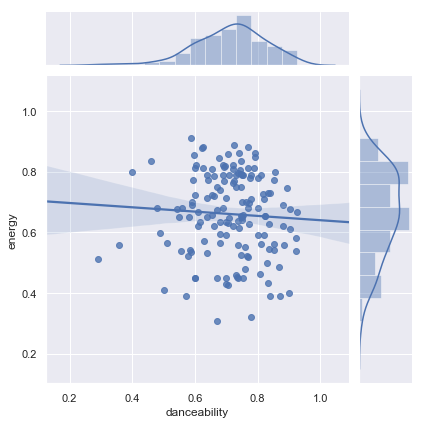

In [9]:
sns.jointplot(x='danceability', y = 'energy', kind = 'reg', data = df_50)

Danceability by Rank

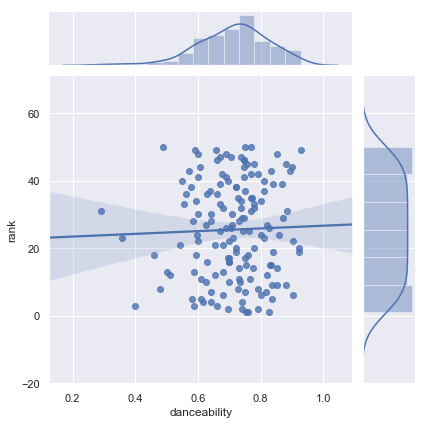

In [10]:
sns.jointplot(x='danceability', y = 'rank', kind = 'reg', data = df_50)

Liveness by Energy

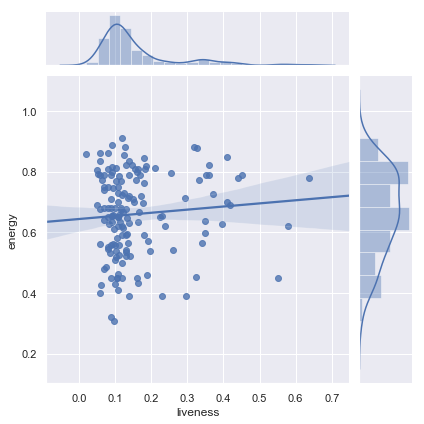

In [11]:
sns.jointplot(x='liveness', y = 'energy', kind = 'reg', data = df_50)

Hexbin of Rank and Energy

Text(0.5, 0.98, 'Hexbin Joint Plot of Rank and Energy')

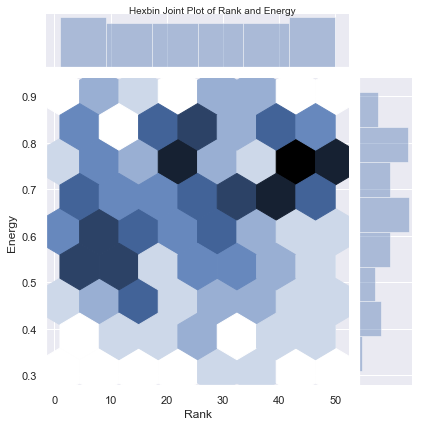

In [12]:
hexbin = sns.jointplot(x = 'rank', y = 'energy', data = df_50, kind ='hex')
hexbin.set_axis_labels(xlabel = 'Rank', ylabel = 'Energy')
hexbin.fig.suptitle('Hexbin Joint Plot of Rank and Energy', fontsize = 10) 

Hexbin of Rank and Liveness

Text(0.5, 0.98, 'Hexbin Joint Plot of Rank and Energy')

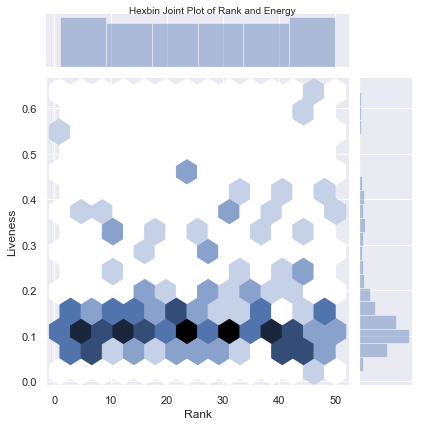

In [13]:
hexbin = sns.jointplot(x = 'rank', y = 'liveness', data = df_50, kind ='hex')
hexbin.set_axis_labels(xlabel = 'Rank', ylabel = 'Liveness')
hexbin.fig.suptitle('Hexbin Joint Plot of Rank and Energy', fontsize = 10) 

Overall Correlation Matrix

In [14]:
df_50.corr(method ='pearson')

,year,rank,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
year,1.000000,0.000000,0.017784,-0.068464,-0.018098,0.102250,0.083026,0.009718,-0.024868,0.090578,-0.226679,-0.226717
rank,0.000000,1.000000,0.031355,0.094494,0.015921,-0.041563,0.041371,0.102340,-0.004713,-0.116648,-0.006093,-0.006092
danceability,0.017784,0.031355,1.000000,-0.058385,0.050969,0.051110,-0.023216,-0.112716,0.191246,-0.065606,0.066336,0.066327
energy,-0.068464,0.094494,-0.058385,1.000000,0.665547,-0.060400,-0.332195,0.083817,0.281114,0.047297,0.079728,0.079747
loudness,-0.018098,0.015921,0.050969,0.665547,1.000000,-0.300341,-0.172128,0.069834,0.313608,0.009779,0.144897,0.144923
speechiness,0.102250,-0.041563,0.051110,-0.060400,-0.300341,1.000000,0.006729,-0.069679,-0.112473,0.256417,0.034862,0.034844
acousticness,0.083026,0.041371,-0.023216,-0.332195,-0.172128,0.006729,1.000000,-0.099914,0.072663,-0.173187,-0.017497,-0.017525
liveness,0.009718,0.102340,-0.112716,0.083817,0.069834,-0.069679,-0.099914,1.000000,0.011982,-0.083230,-0.025617,-0.025645
valence,-0.024868,-0.004713,0.191246,0.281114,0.313608,-0.112473,0.072663,0.011982,1.000000,-0.014279,-0.057459,-0.057439
tempo,0.090578,-0.116648,-0.065606,0.047297,0.009779,0.256417,-0.173187,-0.083230,-0.014279,1.000000,-0.136089,-0.136073


Boxplot of Speechiness by Year

Text(0, 0.5, 'Speechiness')

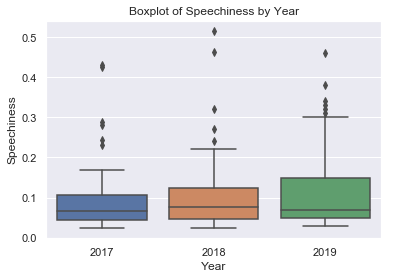

In [15]:
box, ax = plt.subplots()
ax = sns.boxplot(x='year', y='speechiness', data = df_50)
ax.set_title("Boxplot of Speechiness by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Speechiness")

Speechiest Song

In [16]:
df[df['speechiness'] == df.speechiness.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
191,2018,92,Yes Indeed,Lil Baby,0.964,0.346,-9.309,0.53,0.035,0.108,0.562,119.958,142.273,2.371217


Lowest Speechiness

In [17]:
df[df['speechiness'] == df.speechiness.min()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
40,2017,41,Perfect,Ed Sheeran,0.599,0.448,-6.312,0.0232,0.163,0.106,0.168,95.05,263.4,4.39
129,2018,30,Perfect,Ed Sheeran,0.599,0.448,-6.312,0.0232,0.163,0.106,0.168,95.05,263.4,4.39


Loudness by Energy

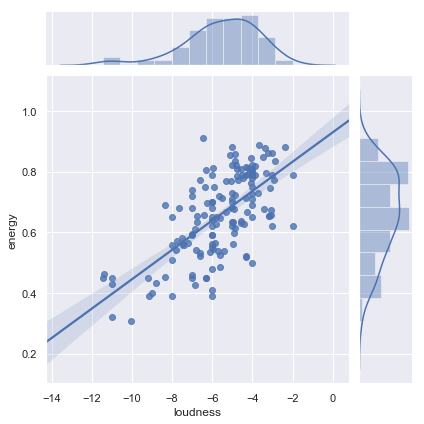

In [18]:
sns.jointplot(x='loudness', y = 'energy', kind = 'reg', data = df_50)

Most Danceable Song

In [19]:
df_50[df_50['danceability'] == df_50.danceability.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
48,2017,49,Bad and Boujee (feat. Lil Uzi Vert),Migos,0.927,0.665,-5.313,0.244,0.061,0.123,0.175,127.076,343.15,5.719167


Most Energetic Song

In [20]:
df_50[df_50['energy'] == df_50.energy.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
112,2018,13,Nice For What,Drake,0.586,0.909,-6.474,0.0705,0.0891,0.119,0.757,93.394,210.747,3.51245


Loudest Song

In [21]:
df_50[df_50['loudness'] == df_50.loudness.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
213,2019,14,Otro Trago - Remix,Sech,0.73,0.79,-2.0,0.20,0.07,0.06,0.1,176.0,288.0,4.800
245,2019,46,One Thing Right,Marshmello,0.66,0.62,-2.0,0.05,0.07,0.58,0.8,88.0,182.0,3.033


Most Acoustic Song

In [23]:
df[df['acousticness'] == df.acousticness.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
180,2018,81,lovely (with Khalid),Billie Eilish,0.351,0.296,-10.109,0.0333,0.934,0.095,0.12,115.284,200.186,3.336433


Most Liveness

In [24]:
df[df['liveness'] == df.liveness.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
144,2018,45,Me Niego,Reik,0.777,0.779,-4.449,0.0972,0.0543,0.636,0.768,94.023,221.653,3.694217


Most Valence

In [25]:
df[df['valence'] == df.valence.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
23,2017,24,There's Nothing Holdin' Me Back,Shawn Mendes,0.857,0.8,-4.035,0.0583,0.381,0.0913,0.966,121.996,199.44,3.324


Highest Tempo

In [26]:
df[df['tempo'] == df.tempo.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
52,2017,53,Let Me Love You,DJ Snake,0.476,0.718,-5.309,0.0576,0.0784,0.122,0.142,199.864,205.947,3.43245


Longest Song

In [27]:
df[df['duration_sec'] == df.duration_sec.max()]

,year,rank,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
121,2018,22,Te Bot? - Remix,Nio Garcia,0.903,0.675,-3.445,0.214,0.542,0.0595,0.442,96.507,417.92,6.965333


In [28]:
df_50_total = df[df['rank'] <= 50]
df_17 = df_50_total[(df_50_total['year'] == 2017)]
df_18 = df_50_total[(df_50_total['year'] == 2018)]
df_19 = df_50_total[(df_50_total['year'] == 2019)]
top5_17 = df_17[(df_17['rank'] <= 5)]
top5_18 = df_18[(df_18['rank'] <= 5)]
top5_19 = df_19[(df_19['rank'] <= 5)]

Text(0, 0.5, 'Rank')

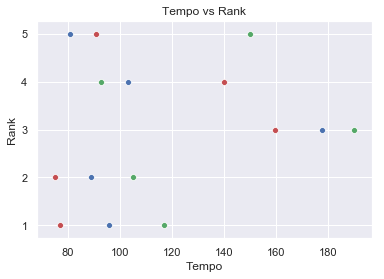

In [29]:
scatter, ax = plt.subplots()

ax = sns.scatterplot(x = 'tempo', y = 'rank', color = 'b', data = top5_17)
ax1 = sns.scatterplot(x = 'tempo', y = 'rank', color = 'r', data = top5_18)
ax2 = sns.scatterplot(x = 'tempo', y = 'rank', color = 'g', data = top5_19)
ax.set_title("Tempo vs Rank")
ax.set_xlabel("Tempo")
ax.set_ylabel("Rank")

Text(0, 0.5, 'Rank')

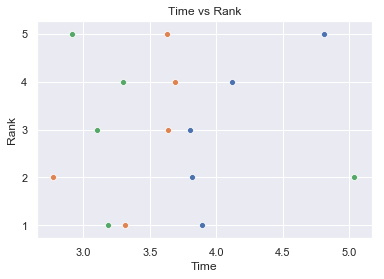

In [30]:
scatter, ax = plt.subplots()

ax = sns.scatterplot(x = 'duration_min', y = 'rank', data = top5_17)
ax1 = sns.scatterplot(x = 'duration_min', y = 'rank', data = top5_18)
ax2 = sns.scatterplot(x = 'duration_min', y = 'rank', data = top5_19)
ax.set_title("Time vs Rank")
ax.set_xlabel("Time")
ax.set_ylabel("Rank")

Text(0, 0.5, 'loudness')

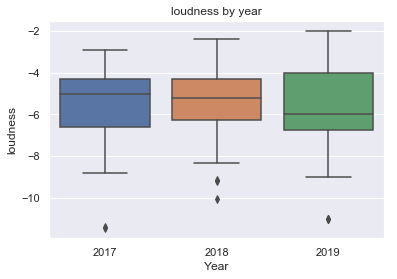

In [31]:
# box plot for year by loudness

box, ax = plt.subplots()

ax = sns.boxplot(x = 'year', y = 'loudness', data = df_50_total)
ax.set_title("loudness by year")
ax.set_xlabel("Year")
ax.set_ylabel("loudness")

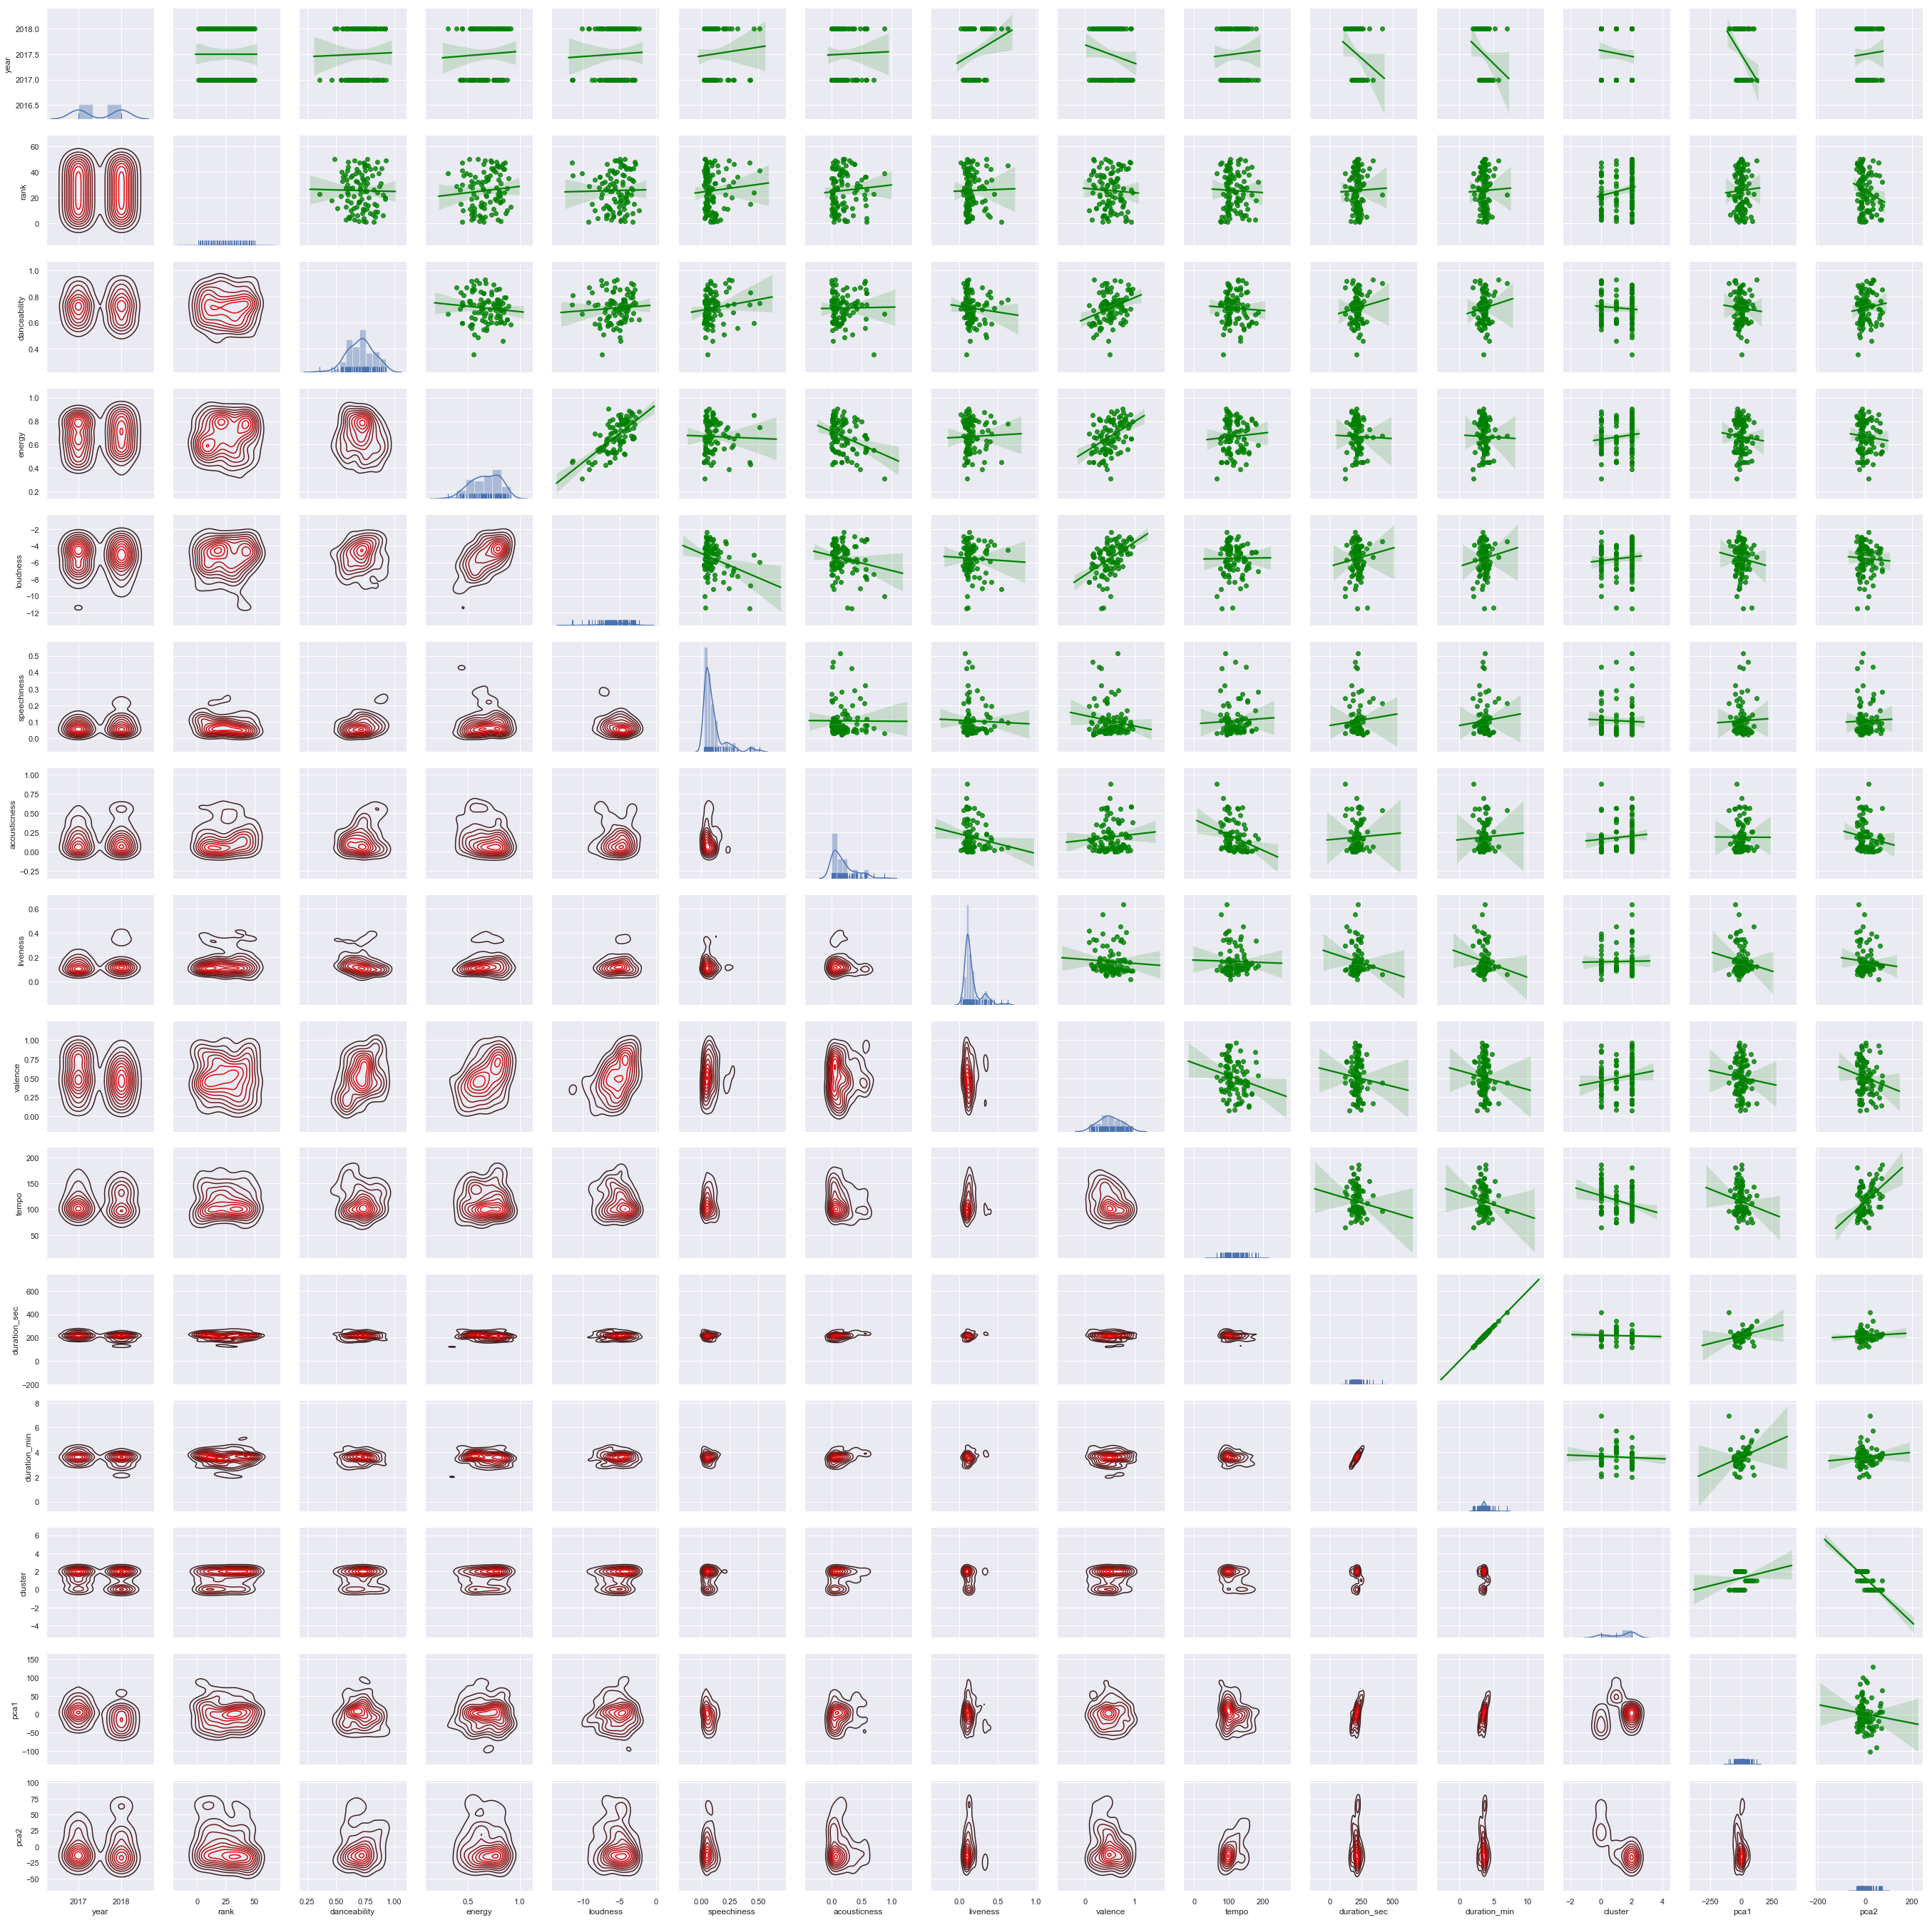

In [44]:
pair_grid = sns.PairGrid(df_50)

pair_grid = pair_grid.map_upper(sns.regplot, color = 'green')
pair_grid = pair_grid.map_lower(sns.kdeplot, color = 'red')
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)

## Begin Multiple Regression

In [32]:
# import regression packages from scikit learn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Kitchen Sink Model
Let's begin by using all possible predictor features in original dataset to predict rank and see what happens

Intercept:  6.965071551576997
Coefficients:  [ 1.56712232e+01  2.11604698e+01 -9.44836641e-01 -9.81013680e+00
  5.71220825e+00  1.40131554e+01 -1.40931814e+00 -6.97500194e-02
 -8.70281223e+01  5.22033799e+03]
Mean Absolute Error: 11.882486204452123
Mean Squared Error: 205.3138911458501
Root Mean Squared Error: 14.328778424759387


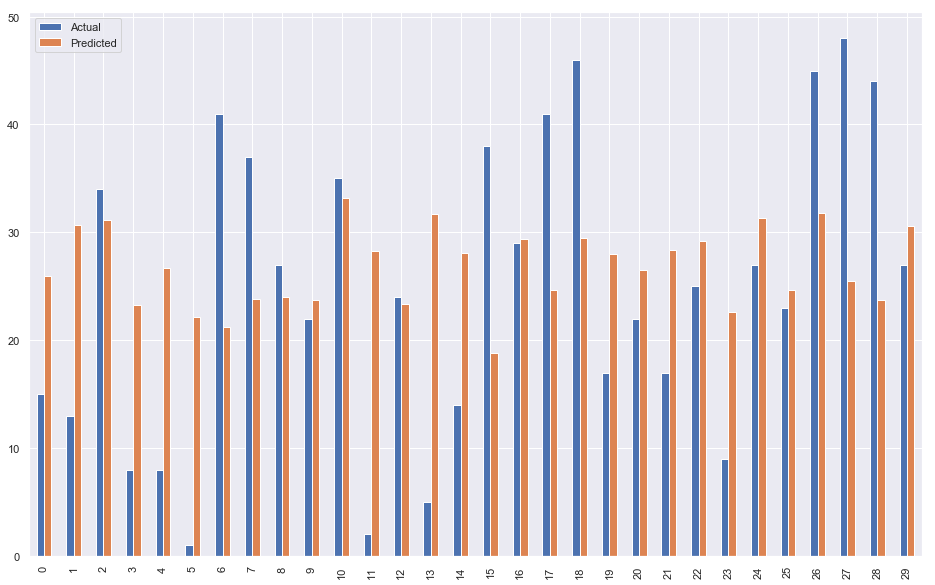

In [33]:
# categorize independent and dependent variables
X = df_50[['danceability','energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_sec', 'duration_min']].values
y = df_50['rank'].values

# split in training - testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train our model on training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Intercept: ", regressor.intercept_) # intercept
print("Coefficients: ", regressor.coef_) # coefficient

y_pred = regressor.predict(X_test)
y_pred
df_coeff = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})

df_coeff.plot(kind = 'bar', figsize = (16, 10))

# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Kitchen Sink Analysis
The kitchen sink model has too many predictors, and has a fairly low predictive capacity.
We can improve this model this model by only using the most powerful predictors. 

## New Feature Selections
Let's focus on the variables with the highest correlation with rank

In [34]:
df_50.corr(method ='pearson').head(2)

,year,rank,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min
year,1.0,0.0,0.017784,-0.068464,-0.018098,0.102250,0.083026,0.009718,-0.024868,0.090578,-0.226679,-0.226717
rank,0.0,1.0,0.031355,0.094494,0.015921,-0.041563,0.041371,0.102340,-0.004713,-0.116648,-0.006093,-0.006092


### Univariate regression predicting "rank" with "energy"

Intercept:  19.943061943612328
Coefficients:  [8.7476004]
Mean Absolute Error: 11.507592164262315
Mean Squared Error: 184.71045760017205
Root Mean Squared Error: 13.590822550536522


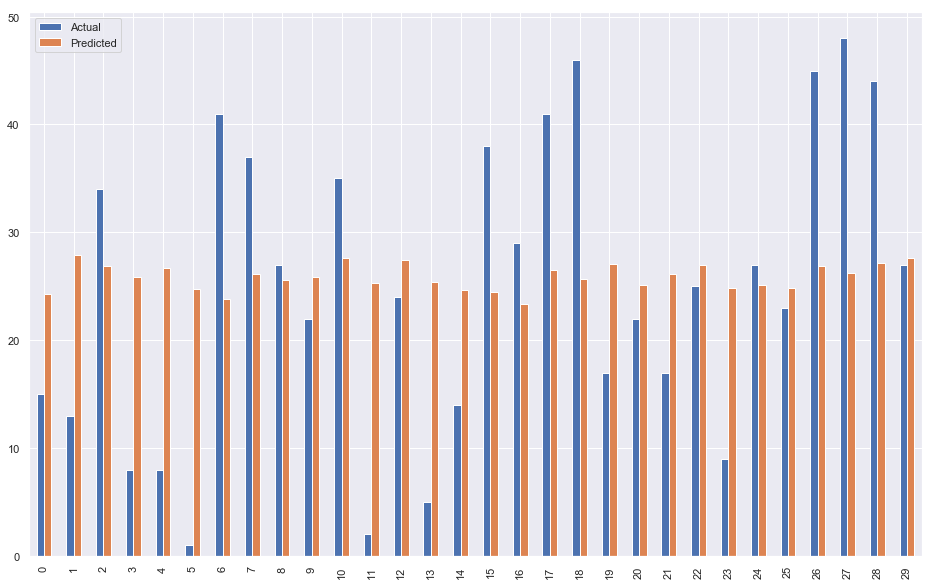

In [35]:
# categorize independent and dependent variables
X = df_50[['energy']].values
y = df_50['rank'].values

# split in training - testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train our model on training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Intercept: ", regressor.intercept_) # intercept
print("Coefficients: ", regressor.coef_) # coefficient

y_pred = regressor.predict(X_test)
y_pred
df_coeff = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})

df_coeff.plot(kind = 'bar', figsize = (16, 10))

# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Energy model analysis
A model using just "energy" to predict rank is not much better.

## K Means Clustering
We will create K Means clusters among the songs in our dataset and then use which cluster they are in as a predictor variable in a univariate and then a multiple regression. 

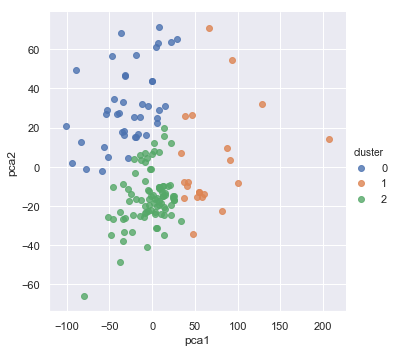

In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_50_drop = df_50.drop(['year', 'rank', 'name', 'artists'], axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 50).fit(df_50_drop.values)
kmeans_3 = pd.DataFrame(kmeans.labels_, columns = ['cluster'])
pca = PCA(n_components = 2).fit(df_50_drop)
pca_trans = pca.transform(df_50_drop)
pca_trans_df = pd.DataFrame(pca_trans, columns = ['pca1', 'pca2'])
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis = 1)
fig = sns.lmplot(x = 'pca1', y = 'pca2', data = kmeans_3, hue = 'cluster', fit_reg = False)

Merge cluster with original dataset and use cluster as a variable in our regression to see if the cluster is a useful predictor. 

In [37]:
df_50 = df_50.merge(kmeans_3, left_index = True, right_index = True)

Let's break down the characterisics of songs by cluster

In [38]:
cluster_0 = df_50[df_50['cluster'] == 0 ]
cluster_1 = df_50[df_50['cluster'] == 1 ]
cluster_2 = df_50[df_50['cluster'] == 2 ]

##### Cluster 0

In [39]:
cluster_0.corr(method = "pearson").head(2)

,year,rank,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min,cluster,pca1,pca2
year,1.00000,0.07724,0.198928,0.144165,0.339959,-0.319445,0.238274,0.106854,0.077367,-0.661010,0.094386,0.094386,NaN,-0.350574,-0.152218
rank,0.07724,1.00000,-0.431614,0.088952,-0.122910,-0.198238,0.186925,-0.108214,-0.075219,-0.037715,-0.092718,-0.092718,NaN,0.144332,-0.066300


Cluster 0 has higher comparitve correlation of danceability, energy, and loudness.

##### Cluster 1

In [40]:
cluster_1.corr(method = "pearson").head(2)

,year,rank,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min,cluster,pca1,pca2
year,1.000000,-0.360838,0.091779,0.217975,0.332512,0.271702,-0.128806,0.110174,0.010480,0.210312,-0.726626,-0.726626,NaN,0.275026,0.213010
rank,-0.360838,1.000000,0.311459,-0.092628,-0.274708,0.290388,0.250082,-0.108175,-0.219755,0.054893,0.435928,0.435928,NaN,0.197272,-0.108327


Cluster 1 has a higher correlation of acousticness, speechiness, danceability, and duration.

##### Cluster 2

In [41]:
cluster_2.corr(method = "pearson").head(2)

,year,rank,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_sec,duration_min,cluster,pca1,pca2
year,1.000000,0.090043,-0.116777,-0.053190,-0.197219,0.187572,0.014339,0.272894,-0.320945,0.326072,-0.046641,-0.046641,NaN,-0.320741,-0.300691
rank,0.090043,1.000000,0.111841,0.104315,0.123487,0.153528,-0.076443,0.086758,-0.048907,0.049316,-0.031346,-0.031346,NaN,-0.078354,-0.171152


Cluster 2 has higher correlation with danceablility, acousticness, and speechiness, but less than Cluster 1. This seems to be the "everything else" cluster. 

### Regression including cluster

Intercept:  21.59578425294482
Coefficients:  [3.71047737]
Mean Absolute Error: 11.985647861128331
Mean Squared Error: 204.7377620957126
Root Mean Squared Error: 14.308660387880922


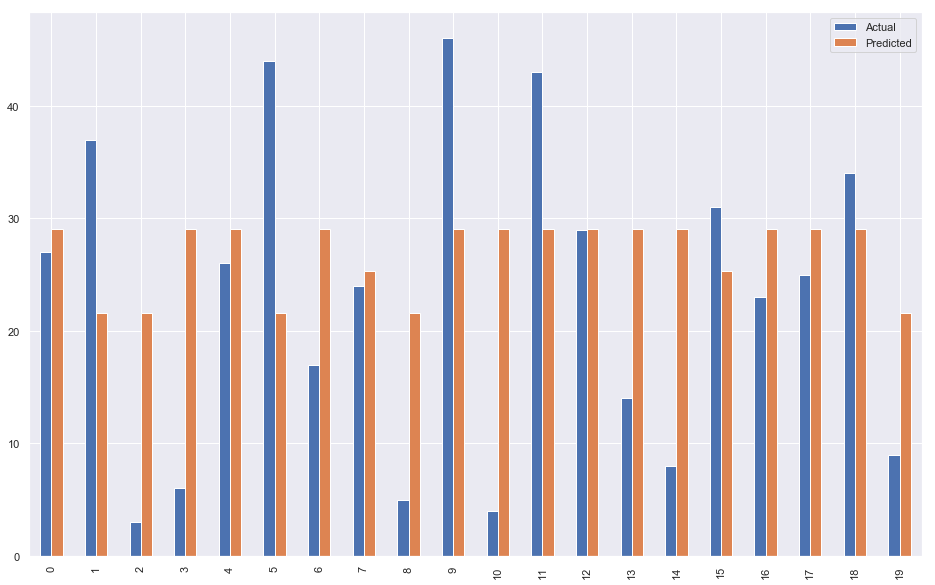

In [42]:
# categorize independent and dependent variables
X = df_50[['cluster']].values
y = df_50['rank'].values

# split in training - testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train our model on training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Intercept: ", regressor.intercept_) # intercept
print("Coefficients: ", regressor.coef_) # coefficient

y_pred = regressor.predict(X_test)
y_pred
df_coeff = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})

df_coeff.plot(kind = 'bar', figsize = (16, 10))

# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

This has a higher error than the Kitchen Sink model, but lower than our univariate regression on energy.
Let's mix the best of both worlds in a final linear regression model.

### Full Regression with most highly correlated variables and cluster

Intercept:  19.548952258191658
Coefficients:  [3.76640905 0.68873833 0.01020856 2.12155272]
Mean Absolute Error: 11.947854554638896
Mean Squared Error: 203.6238188406292
Root Mean Squared Error: 14.269681805864812


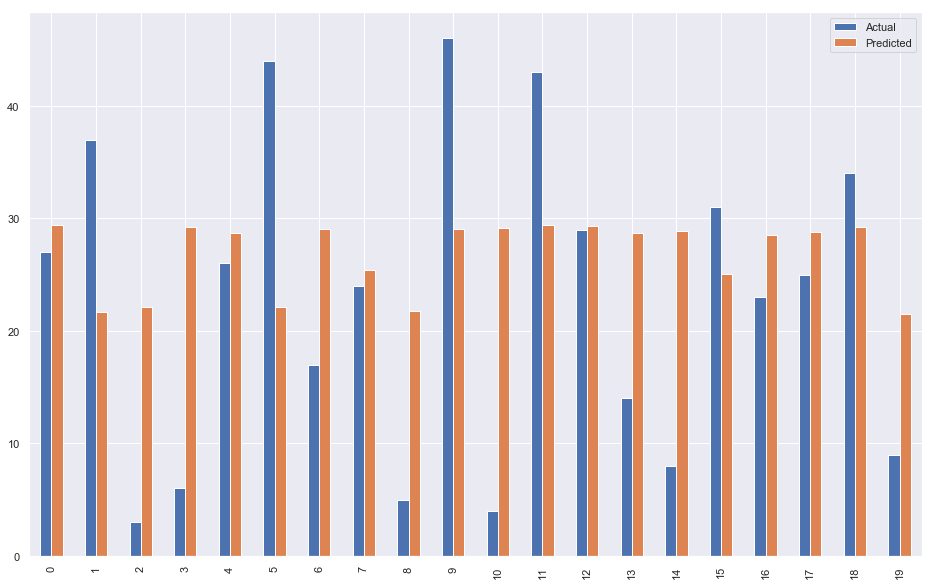

In [43]:
# categorize independent and dependent variables
X = df_50[['cluster', 'energy', 'tempo', 'liveness']].values
y = df_50['rank'].values

# split in training - testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train our model on training dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Intercept: ", regressor.intercept_) # intercept
print("Coefficients: ", regressor.coef_) # coefficient

y_pred = regressor.predict(X_test)
y_pred
df_coeff = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})

df_coeff.plot(kind = 'bar', figsize = (16, 10))

# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Final Takeaways
Of avaliable metrics, "energy" had the highest predictive prowess of song rank.
Our cluster analysis adds meaningful predictive prowess. 
